# README

## Introduction

The `mcm` function is a tool for analyzed different metrics from a confusion matrix. 

This function depends of `pandas` and the function `confusion_matrix` from `sklearn.metrics`.

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [ ]:
?confusion_matrix

Signature:
confusion_matrix(
    y_true,
    y_pred,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If ``None

In [ ]:
data = pd.DataFrame({
    'y_true': ['Positive']*47 + ['Negative']*18,
    'y_pred': ['Positive']*37 + ['Negative']*10 + ['Positive']*5 + ['Negative']*13})

In [ ]:
confusion_matrix(y_true = data.y_true, 
                 y_pred = data.y_pred, 
                 labels = ['Negative', 'Positive'])

array([[13,  5],
       [10, 37]], dtype=int64)

In this case, from the confusion matrix we have the following results:

  * True Positive (TP): 34
  * True Negative (TN): 13
  * False Positive (FP): 5
  * False Negative (FN): 10
    

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true = data.y_true, 
                                  y_pred = data.y_pred, 
                                  labels = ['Negative', 'Positive']).ravel()

In [ ]:
(tn, fp, fn, tp)

(13, 5, 10, 37)

## MCM function

The `mcm`has been developed as:

In [ ]:
def mcm(tn, fp, fn, tp):
    """Let be a confusion matrix like this:
    
    
      N    P
    +----+----+
    |    |    |
    | TN | FP |
    |    |    |
    +----+----+
    |    |    |
    | FN | TP |
    |    |    |
    +----+----+
    
    The observed values by columns and the expected values by rows and the positive class in right column. With these definitions, the TN, FP, FN and TP values are that order.
    
    
    Parameters
    ----------
    tn : integer
         True Negative
    fp : integer
         False Positive
    fn : integer
         False Negative
    tp : integer
         True Positive
   
    Returns
    -------
    sum : float
          Sum of values
    
    Notes
    -----
    https://en.wikipedia.org/wiki/Confusion_matrix
    https://developer.lsst.io/python/numpydoc.html
    
    Examples
    --------
    data = pd.DataFrame({
    'y_true': ['Positive']*47 + ['Negative']*18,
    'y_pred': ['Positive']*37 + ['Negative']*10 + ['Positive']*5 + ['Negative']*13})
    
    tn, fp, fn, tp = confusion_matrix(y_true = data.y_true, 
                                  y_pred = data.y_pred, 
                                  labels = ['Negative', 'Positive']).ravel()
    
    """
    mcm = []
    
    mcm.append(['Sensitivity', tp / (tp + fn)])
    mcm.append(['Recall', tp / (tp + fn)])
    mcm.append(['True Positive rate (TPR)', tp / (tp + fn)])
    mcm.append(['Specificity', tn / (tn + fp)])
    mcm.append(['True Negative Rate (TNR)', tn / (tn + fp)])
    
    mcm.append(['Precision', tp / (tp + fp)])
    mcm.append(['Positive Predictive Value (PPV)', tp / (tp + fp)])
    mcm.append(['Negative Predictive Value (NPV)', tn / (tn + fn)])
        
    mcm.append(['False Negative Rate (FNR)', fn / (fn + tp)])
    mcm.append(['False Positive Rate (FPR)', fp / (fp + tn)])
    mcm.append(['False Discovery Rate (FDR)', fp / (fp + tp)])
    
    mcm.append(['Accuracy', (tp + tn) / (tp + tn + fp + fn)])
    mcm.append(['F1 Score', 2*tp / (2*tp + fp + fn)])
    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    
    mcm.append(['Positive Likelihood Ratio (LR+)', tpr / fpr])
    mcm.append(['Negative Likelihood Ratio (LR-)', fnr / tnr])
    
    return pd.DataFrame(mcm, columns = ['Metric', 'Value'])



In [ ]:
?mcm

Signature: mcm(tn, fp, fn, tp)
Docstring:
Let be a confusion matrix like this:


  N    P
+----+----+
|    |    |
| TN | FP |
|    |    |
+----+----+
|    |    |
| FN | TP |
|    |    |
+----+----+

The observed values by columns and the expected values by rows and the positive class in right column. With these definitions, the TN, FP, FN and TP values are that order.


Parameters
----------
tn : integer
    True Negative
fp: integer
    False Positive
fn: integer
    False Negative
tp: integer
    True Positive

Returns
-------
sum : float
    Sum of values

Notes
-----
https://en.wikipedia.org/wiki/Confusion_matrix
https://developer.lsst.io/python/numpydoc.html

Examples
--------
data = pd.DataFrame({
'y_true': ['Positive']*47 + ['Negative']*18,
'y_pred': ['Positive']*37 + ['Negative']*10 + ['Positive']*5 + ['Negative']*13})

tn, fp, fn, tp = confusion_matrix(y_true = data.y_true, 
                              y_pred = data.y_pred, 
                              labels = ['Negative'

The arguments of `mcm` function are: true positive (tn), false positive (fp), false negative (fn) and true positive (tp) is this order.

In [ ]:
mcm(tn, fp, fn, tp)

,Metric,Value
0,Sensitivity,0.787234
1,Recall,0.787234
2,True Positive rate (TPR),0.787234
3,Specificity,0.722222
4,True Negative Rate (TNR),0.722222
5,Precision,0.880952
6,Positive Predictive Value (PPV),0.880952
7,Negative Predictive Value (NPV),0.565217
8,False Negative Rate (FNR),0.212766
9,False Positive Rate (FPR),0.277778


### Bootstrap

We can call the function `mcm` several times with a percentage of samples and estimate the distribution of each metrics.

In the following example, a 80% of the samples has been used in each iteration.

In [ ]:
data = pd.DataFrame({
    'y_true': ['Positive']*47 + ['Negative']*18,
    'y_pred': ['Positive']*37 + ['Negative']*10 + ['Positive']*5 + ['Negative']*13})

In [ ]:
mcm_bootstrap = []

for i in range(100):
    aux = data.sample(frac = 0.8) # 80% of the samples
    tn, fp, fn, tp =\
        confusion_matrix(y_true = aux.y_true, 
                         y_pred = aux.y_pred, 
                         labels = ['Negative', 'Positive']).ravel()

    mcm_bootstrap.append(mcm(tn, fp, fn, tp))

After 100 iterations we can be evaluate the mean, median, minimum, maximum and standar deviation for each metric.

In [ ]:
pd\
    .concat(mcm_bootstrap)\
    .groupby('Metric')\
    .agg({'Value' : ['mean', 'median', 'min', 'max', 'std']})

Value                                \
                                     mean    median       min       max   
Metric                                                                    
Accuracy                         0.767500  0.769231  0.711538  0.826923   
F1 Score                         0.830278  0.828571  0.794118  0.880000   
False Discovery Rate (FDR)       0.119385  0.121212  0.057143  0.156250   
False Negative Rate (FNR)        0.213905  0.216216  0.138889  0.263158   
False Positive Rate (FPR)        0.281694  0.285714  0.142857  0.454545   
Negative Likelihood Ratio (LR-)  0.299955  0.296296  0.202020  0.447154   
Negative Predictive Value (NPV)  0.559698  0.555556  0.375000  0.705882   
Positive Likelihood Ratio (LR+)  2.927705  2.800498  1.663415  5.526316   
Positive Predictive Value (PPV)  0.880615  0.878788  0.843750  0.942857   
Precision                        0.880615  0.878788  0.843750  0.942857   
Recall                           0.786095  0.783784  0.736842  0.861111   
Sensitivity                      0.786095  0.783784  0.736842  0.861111   
Specificity                      0.718306  0.714286  0.545455  0.857143   
True Negative Rate (TNR)         0.718306  0.714286  0.545455  0.857143   
True Positive rate (TPR)         0.786095  0.783784  0.736842  0.861111   

                                           
                                      std  
Metric                                     
Accuracy                         0.025800  
F1 Score                         0.020213  
False Discovery Rate (FDR)       0.024744  
False Negative Rate (FNR)        0.028851  
False Positive Rate (FPR)        0.058819  
Negative Likelihood Ratio (LR-)  0.049006  
Negative Predictive Value (NPV)  0.058436  
Positive Likelihood Ratio (LR+)  0.707941  
Positive Predictive Value (PPV)  0.024744  
Precision                        0.024744  
Recall                           0.028851  
Sensitivity                      0.028851  
Specificity                      0.058819  
True Negative Rate (TNR)         0.058819  
True Positive rate (TPR)         0.028851

## Display

Loading the matplotlib and seaborn to display the results.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

For example, if we want to display the distribution of accuracy we can execute the follwoing code.

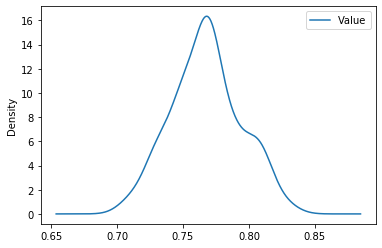

In [ ]:
aux = pd.concat(mcm_bootstrap)
aux\
    .query('Metric == "Accuracy"')\
    .plot(kind = 'density', label = 'Accuracy')
plt.show()

With seaborn is easy to display the distribution of all metrics.

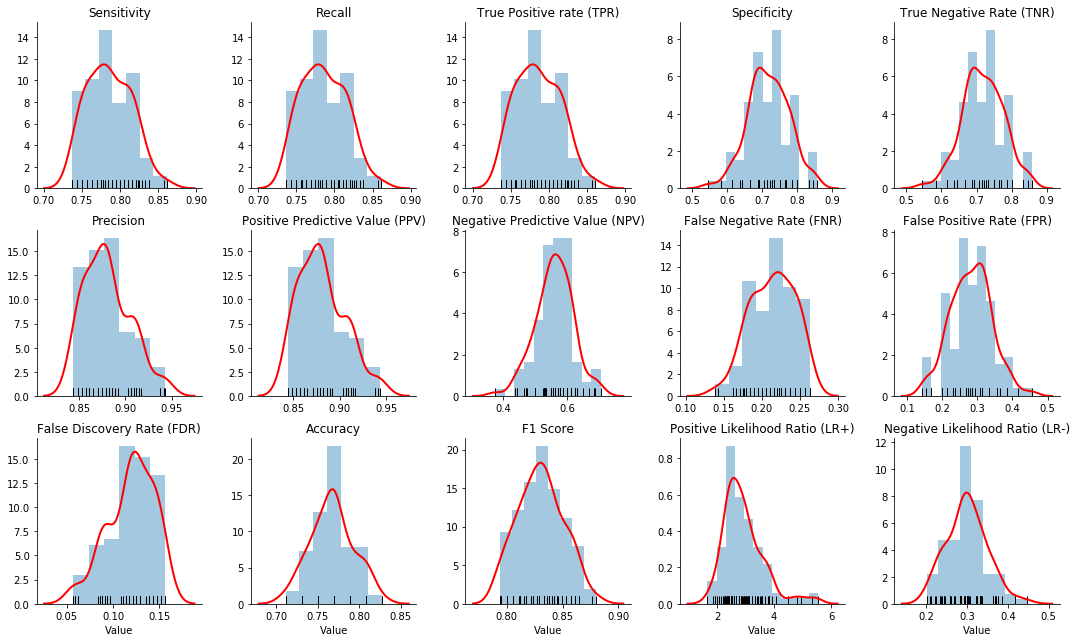

In [ ]:
g = sns.FacetGrid(pd.concat(mcm_bootstrap), 
                  col = 'Metric', 
                  col_wrap = 5, 
                  sharey = False, 
                  sharex = False)
g = g.map(sns.distplot, 'Value', 
          hist = True, 
          kde = True, 
          rug = True, 
          hist_kws = {'color': 'C0'}, 
          kde_kws = {'color': 'red', 'linewidth': 2}, 
          rug_kws = {'color': 'black'})
g = g.set_titles('{col_name}', size = 12)

The `mcm` function can help us to analyse a confusion matrix. If this confusion matrix come from a performed model, we can evaluate it with this function: Sensitivity and Specificity as principal metrics.